In [1]:
import numpy as np
from getdist import plots, loadMCSamples, MCSamples
import getdist
import matplotlib.pyplot as plt

In [2]:
def adjust_chains(chains):
    chains[:,0] *= 10
    chains[:,2] *= 100
    chains[:,3] /= 10
    return chains

In [3]:
chains_folder = "../data/capse_chains/"

samples_Capse_Planck_NUTS = adjust_chains(np.load(chains_folder+"chains_Planck_NUTS.npy"))
samples_Capse_Planck_PF = adjust_chains(np.load(chains_folder+"chains_Planck_PF.npy"))
samples_Capse_Planck_MCHMC_multi = adjust_chains(np.load(chains_folder+"chains_Planck_MCHMC_multi.npy"))
['logA','ns', 'H0','omegabh2','omegach2','tau', 'A_planck']
my_label = ['logA','ns', 'H0','omegabh2','omegach2','tau', 'A_planck']#["logA", "n_s", "H0", "omega_b", "omega_cdm", "tau_reio", "yp2"]
chains_Capse_Planck_NUTS = MCSamples(samples=samples_Capse_Planck_NUTS, names = my_label, labels = my_label, label = "Capse + NUTS")
chains_Capse_Planck_PF = MCSamples(samples=samples_Capse_Planck_PF, names = my_label, labels = my_label, label = "Capse + Pathfinder")
chains_Capse_Planck_MCHMC_multi = MCSamples(samples=samples_Capse_Planck_MCHMC_multi, names = my_label, labels = my_label, label = "Capse + MCHMC")

Removed no burn in
Removed no burn in
Removed no burn in


In [4]:
path_chains = '../data/p18_ttteee_lite_lcdm_chains/'
chains_Cobaya_Planck = loadMCSamples(path_chains+"p18_ttteee_lite_lcdm", settings = {'ignore_rows': 0.3, 'label' : "Cobaya"})
chains_Cobaya_Planck.label = "CAMB + Cobaya"

../data/p18_ttteee_lite_lcdm_chains/p18_ttteee_lite_lcdm.4.txt
../data/p18_ttteee_lite_lcdm_chains/p18_ttteee_lite_lcdm.2.txt
../data/p18_ttteee_lite_lcdm_chains/p18_ttteee_lite_lcdm.1.txt
../data/p18_ttteee_lite_lcdm_chains/p18_ttteee_lite_lcdm.3.txt
Removed 0.3 as burn in


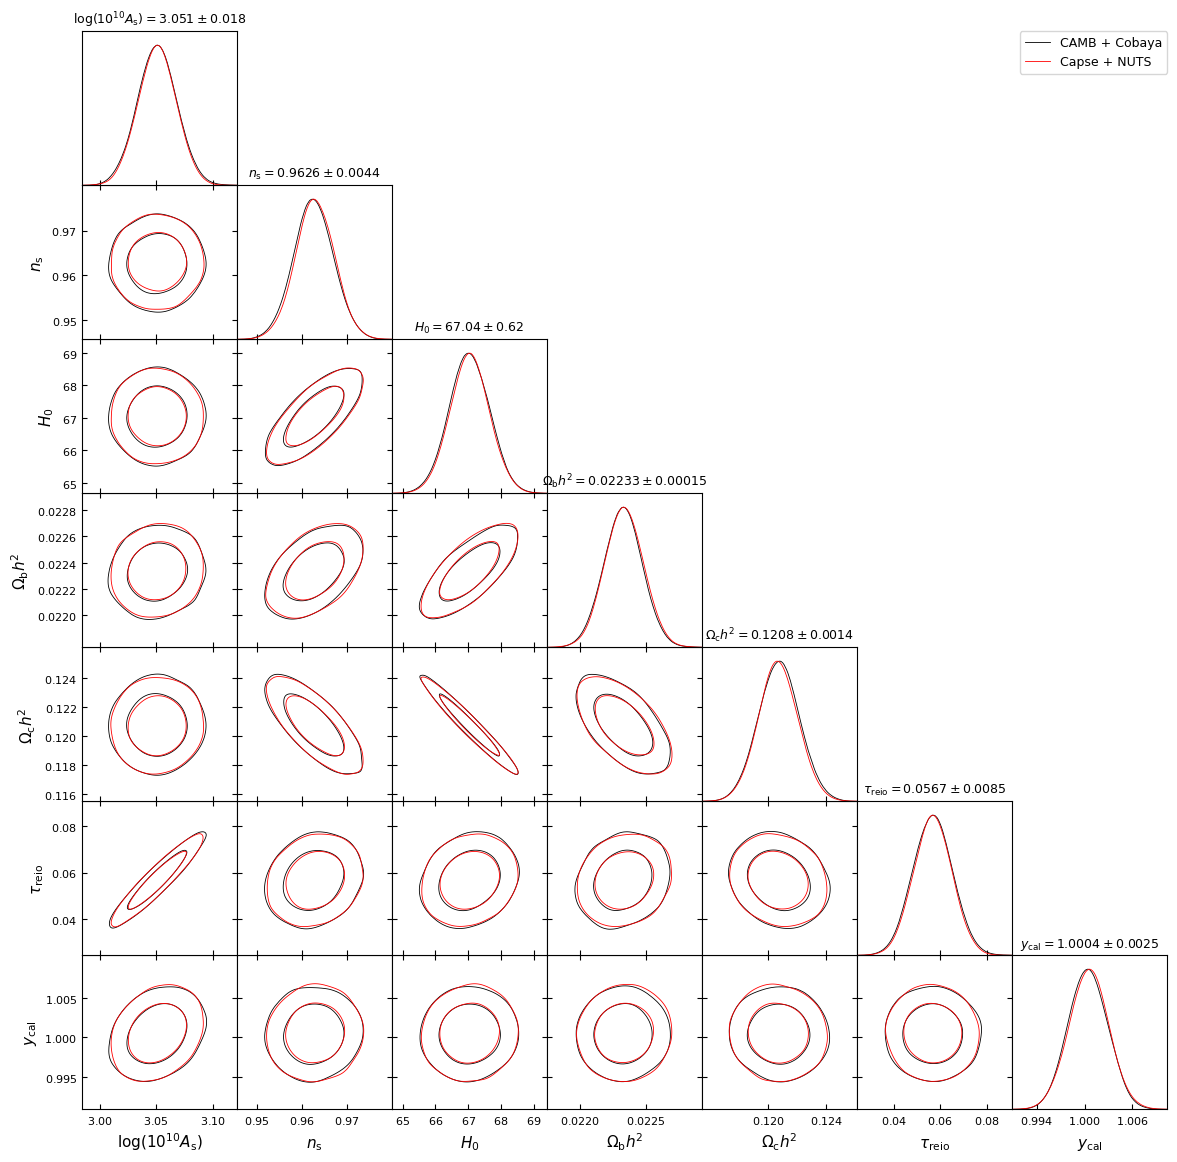

In [5]:
g = plots.get_subplot_plotter()
g.settings.title_limit_fontsize = 12
g.settings.linewidth=1
g.triangle_plot([chains_Cobaya_Planck, chains_Capse_Planck_NUTS,], ["logA", "ns", "H0", "omegabh2", "omegach2", "tau", "A_planck"],filled=False, legend_loc='upper right', title_limit=1, linewidth = 4)
plt.savefig("contour_comparison_Planck.png")
plt.savefig("contour_comparison_Planck.pdf")

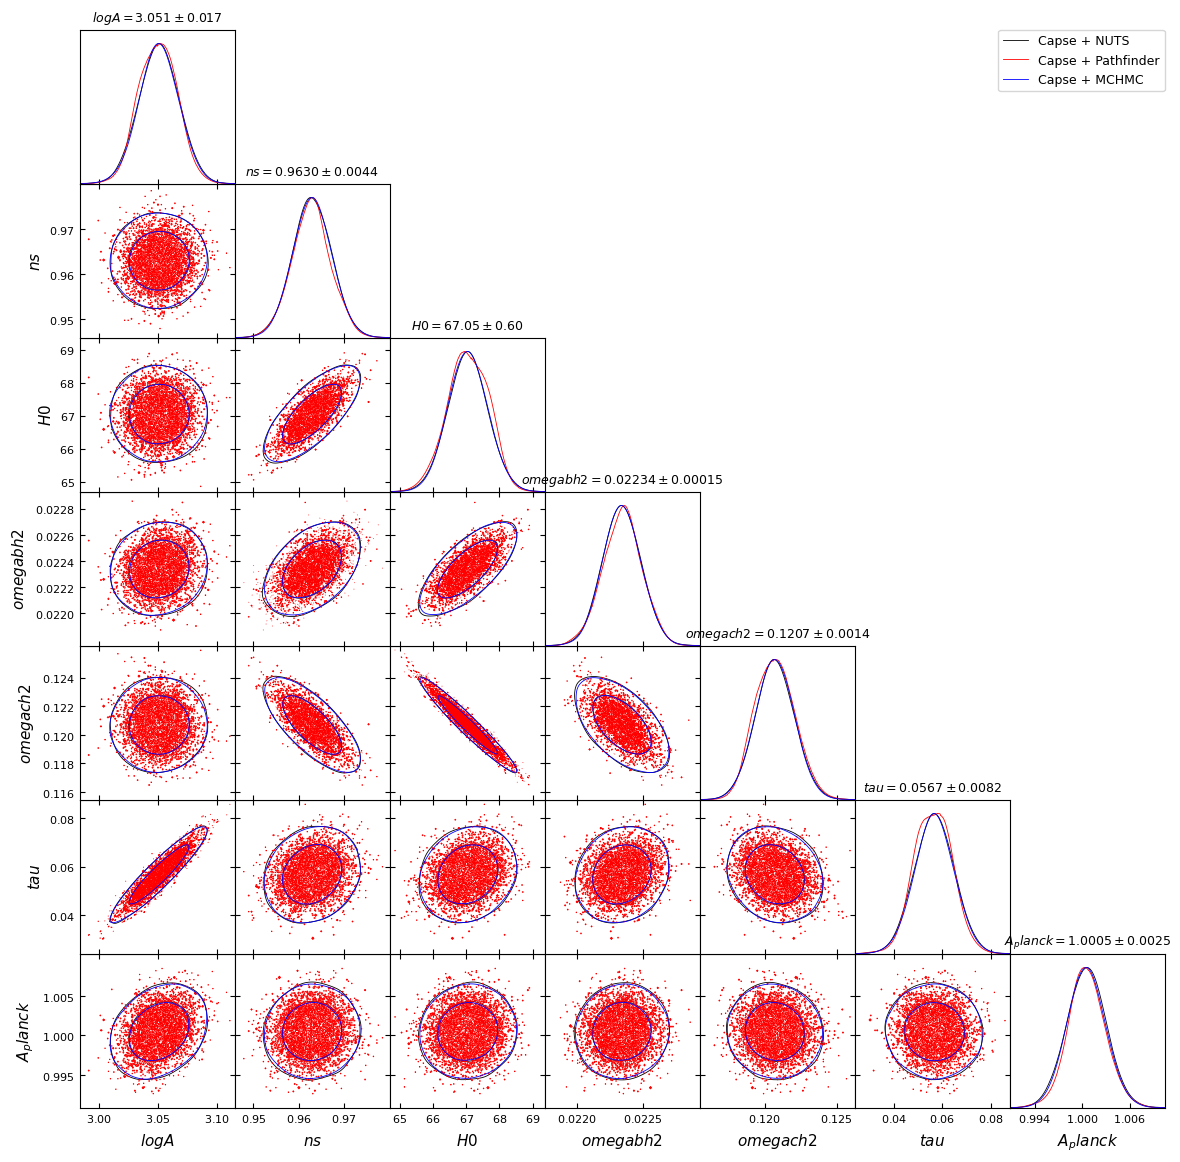

In [6]:
g = plots.get_subplot_plotter()
g.settings.title_limit_fontsize = 12
g.settings.linewidth=1
g.triangle_plot([chains_Capse_Planck_NUTS, chains_Capse_Planck_PF, chains_Capse_Planck_MCHMC_multi], ["logA", "ns", "H0", "omegabh2", "omegach2", "tau", "A_planck"],filled=False, legend_loc='upper right', title_limit=1, linewidth = 4)
plt.savefig("sampler_comparison_Planck.png")
plt.savefig("sampler_comparison_Planck.pdf")